<a href="https://www.kaggle.com/chandanarprasad/eda-india-on-kaggle-2021-survey?scriptVersionId=82506924" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25974 entries, 0 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [5]:
df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
                                        ...  
Q38_B_Part_8                           object
Q38_B_Part_9                           object
Q38_B_Part_10                          object
Q38_B_Part_11                          object
Q38_B_OTHER                            object
Length: 369, dtype: object

In [6]:
df.shape

(25974, 369)

In [7]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

In [8]:
cq_df = df.rename(columns={'Q1':'Age','Q2':'Gender','Q3':'Country','Q4':'Education','Q5':'Title','Q6':'Experience'})

In [9]:
cq_df.columns

Index(['Time from Start to Finish (seconds)', 'Age', 'Gender', 'Country',
       'Education', 'Title', 'Experience', 'Q7_Part_1', 'Q7_Part_2',
       'Q7_Part_3',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=369)

In [10]:
cq_df = cq_df[['Age','Gender', 'Country','Education', 'Title', 'Experience']]
cq_df.head()

,Age,Gender,Country,Education,Title,Experience
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years


In [11]:
cq_df.describe().T

,count,unique,top,freq
Age,25974,12,25-29,4931
Gender,25974,6,Man,20598
Country,25974,67,India,7434
Education,25974,8,Master’s degree,10132
Title,25974,16,Student,6804
Experience,25974,8,1-3 years,7874


In [12]:
cq_df.Age.value_counts()

25-29                          4931
18-21                          4901
22-24                          4694
30-34                          3441
35-39                          2504
40-44                          1890
45-49                          1375
50-54                           964
55-59                           592
60-69                           553
70+                             128
What is your age (# years)?       1
Name: Age, dtype: int64

In [13]:
cq_df.Gender.value_counts()

Man                                       20598
Woman                                      4890
Prefer not to say                           355
Nonbinary                                    88
Prefer to self-describe                      42
What is your gender? - Selected Choice        1
Name: Gender, dtype: int64

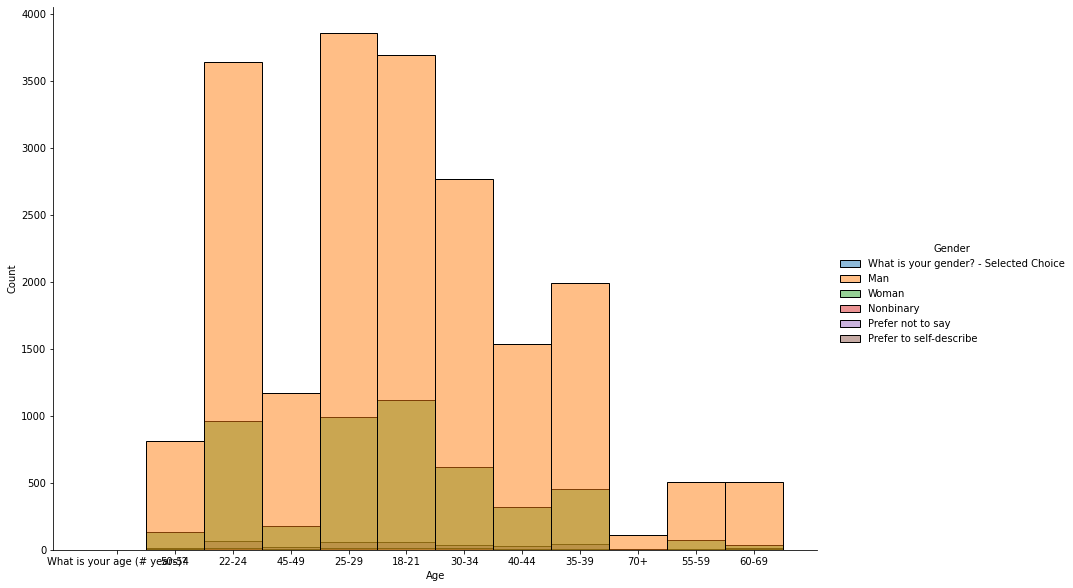

In [14]:
sns.displot(data=cq_df,x='Age',hue='Gender',height=8.27, aspect=11.7/8.27)

In [15]:
cq_df.Country.value_counts().head(20)

India                                                   7434
United States of America                                2650
Other                                                   1270
Japan                                                    921
China                                                    814
Brazil                                                   751
Russia                                                   742
Nigeria                                                  702
United Kingdom of Great Britain and Northern Ireland     550
Pakistan                                                 530
Egypt                                                    482
Germany                                                  470
Spain                                                    454
Indonesia                                                444
Turkey                                                   416
France                                                   401
South Korea             

In [16]:
cq_df.Country.value_counts().tail(20)

Ireland                                      84
Sweden                                       81
Hong Kong (S.A.R.)                           79
Nepal                                        75
Switzerland                                  71
I do not wish to disclose my location        69
Belgium                                      65
Czech Republic                               63
Romania                                      61
Belarus                                      51
Austria                                      51
Ecuador                                      50
Denmark                                      48
Uganda                                       47
Kazakhstan                                   45
Norway                                       45
Algeria                                      44
Ethiopia                                     43
Iraq                                         43
In which country do you currently reside?     1
Name: Country, dtype: int64

<AxesSubplot:>

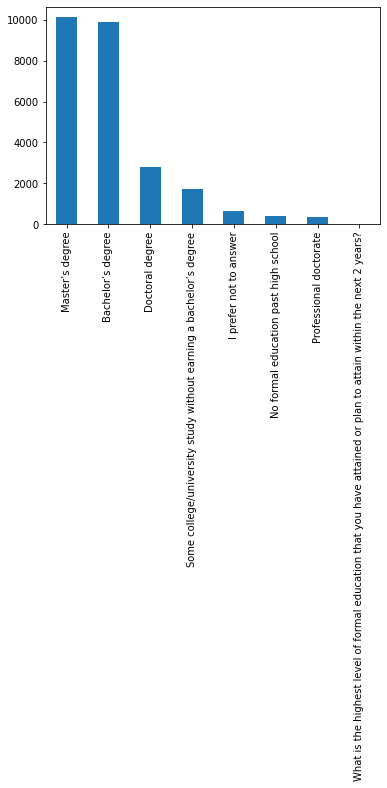

In [17]:
cq_df.Education.value_counts().plot(kind='bar')

<AxesSubplot:>

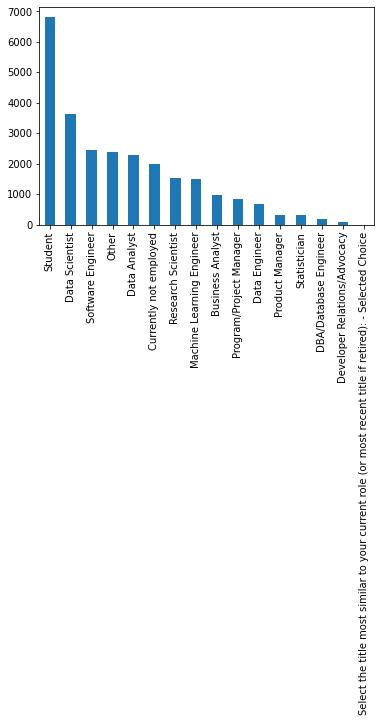

In [18]:
cq_df.Title.value_counts().plot(kind='bar')

In [19]:
cq_df.Experience.value_counts()  

1-3 years                                                            7874
< 1 years                                                            5881
3-5 years                                                            4061
5-10 years                                                           3099
10-20 years                                                          2166
20+ years                                                            1860
I have never written code                                            1032
For how many years have you been writing code and/or programming?       1
Name: Experience, dtype: int64

In [20]:
print(cq_df.corr())

Empty DataFrame
Columns: []
Index: []


In [21]:
check1 = cq_df
age_gender = check1.groupby(['Age','Gender'])
age_gender

In [22]:
check2 = cq_df
age_country = check2.groupby(['Age','Country'])
age_country

In [23]:
df.isna().any().sum()

362

In [24]:
df_India = df[df.Q3 == 'India']
df_India.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1020,25-29,Woman,India,I prefer not to answer,Currently not employed,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,Guild.ai,NaN,NaN,NaN,MLflow,NaN,NaN
7,141,18-21,Woman,India,Some college/university study without earning ...,Student,1-3 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,484,30-34,Man,India,Bachelor’s degree,Data Scientist,5-10 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_India.shape

(7434, 369)

In [26]:
df_India.isna().any().sum()

362

In [27]:
df_India.Q2.value_counts()

Man                        5681
Woman                      1656
Prefer not to say            84
Prefer to self-describe       8
Nonbinary                     5
Name: Q2, dtype: int64

<AxesSubplot:>

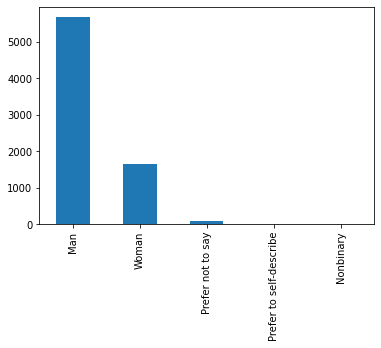

In [28]:
df_India.Q2.value_counts().plot(kind='bar')

In [29]:
df_India.Q5.value_counts()

Student                         2845
Data Scientist                   883
Software Engineer                737
Currently not employed           633
Data Analyst                     564
Other                            508
Machine Learning Engineer        382
Business Analyst                 231
Program/Project Manager          181
Research Scientist               175
Data Engineer                    147
Product Manager                   53
Statistician                      39
DBA/Database Engineer             37
Developer Relations/Advocacy      19
Name: Q5, dtype: int64

In [30]:
df_India.Q1.value_counts()

18-21    2719
22-24    1795
25-29    1275
30-34     695
35-39     407
40-44     284
45-49     141
50-54      59
55-59      33
60-69      20
70+         6
Name: Q1, dtype: int64

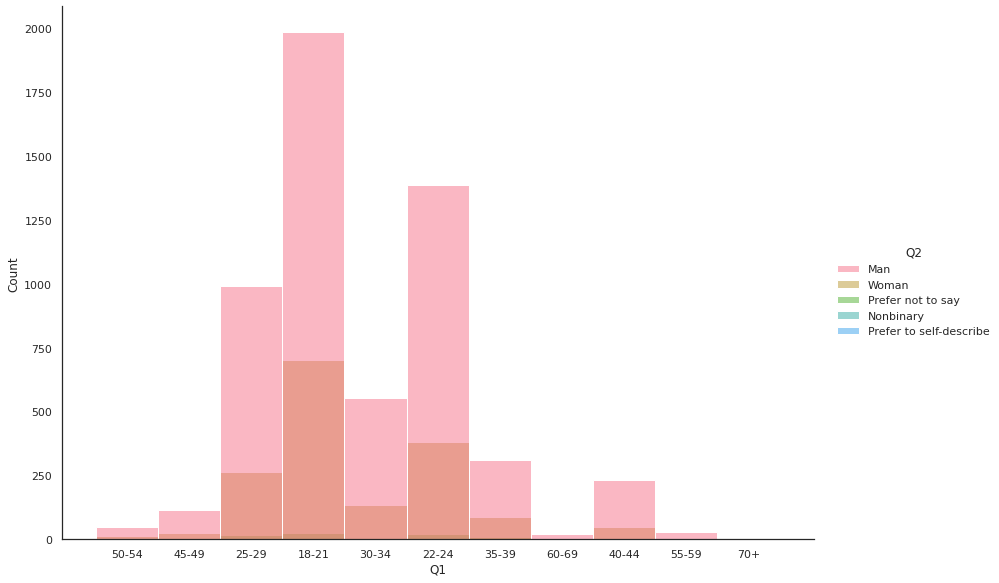

In [31]:
sns.set(style="white", palette="husl")
sns.displot(data=df_India,x='Q1',hue='Q2',height=8.27, aspect=11.7/8.27)

In [32]:
df_India.Q7_Part_1.value_counts()

Python    6443
Name: Q7_Part_1, dtype: int64

In [33]:
df_India.Q7_Part_2.value_counts()

R    1202
Name: Q7_Part_2, dtype: int64